Data source : https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

AT - Ambient temperature  
V - Voltage  
AP - Ambient pressure.  
RH - Relative humidity.  
PE - Electrical Energy output 

Goal : To build a good predictive model for Electrical Energy (PE) based on the independent variables , AT , V, AP and RH. The model is then saved so that it can be accessed by the web application.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
from sklearn.linear_model import LinearRegression, Lasso

In [4]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score , KFold

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
data = pd.read_csv("data_clean.csv")

In [7]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [8]:
data.shape

(9527, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 372.3 KB


In [10]:
def perform_reg(model,X_train, X_test, y_train, y_test, cls = None):
    """
    a.build regression model with the input regressor , train and test data 
    b. display the model metrics
    """
    
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)   
    
    print("\n RMSE :{}".format(np.sqrt(mean_squared_error(y_test,pred_test))))
    print("\n train R2 :{}".format(r2_score(y_train,pred_train)))
    print("\n test R2 :{}".format(r2_score(y_test,pred_test)))
    if cls == 'dt':
        print("\n Max depth :{}".format(model.tree_.max_depth))
        

## Plot the predicted Vs actual values for training data 
    plt.figure(figsize = (8,6))
    plt.scatter(y_train, pred_train)
    plt.xlabel("actual")
    plt.ylabel('predicted')
    plt.title("Train data Vs Predicted")
    plt.show()

## Plot the predicted Vs actual values 
    plt.figure(figsize = (8,6))
    plt.scatter(y_test, pred_test)
    plt.title("Actual and Predicted values for Test data ")
    plt.xlabel("actual")
    plt.ylabel('predicted')
    plt.show()
    
## Plot the residual Vs actual values 
    plt.figure(figsize = (8,6))
    plt.scatter(y_test , (y_test - pred_test))
    plt.title("Residual Vs Actual values ")
    plt.xlabel("actual")
    plt.ylabel('residue')
    plt.show() 
    
## Plot Variable importance for decision tree , random forest
    if (cls == 'dt') | (cls == 'rf') | (cls == 'gbm'):
        cols = X_train.columns.tolist()
        plt.figure(figsize = (15,6))
        plt.bar(cols, model.feature_importances_)
        plt.xticks(rotation = 90)
        plt.show()

    
    return 

Regressing Electrical Energy with Ambient Temperature.  


 X_train : (7621, 1)

 X_test : (1906, 1)

 y_train : (7621,)

 y_test : (1906,)

 RMSE :5.296737655607315

 train R2 :0.8966431870374452

 test R2 :0.9058060900972699


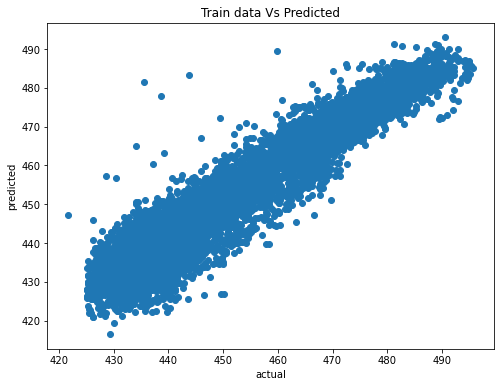

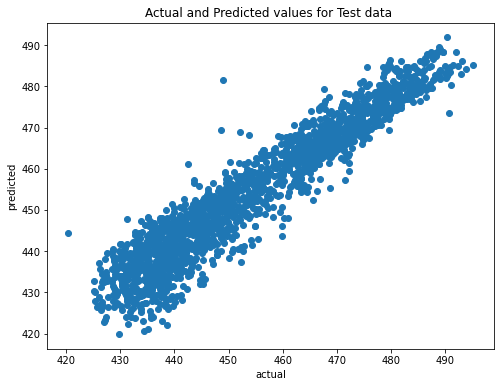

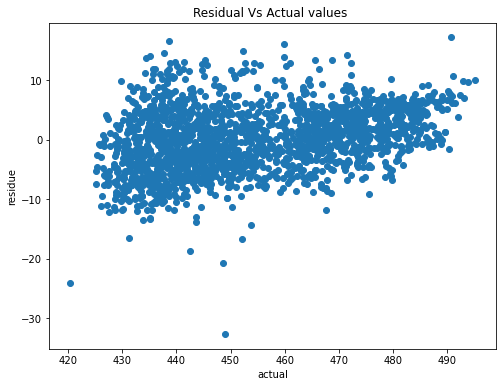

In [11]:
cols = ['AT']
predictors = data[cols]
target = data['PE']

##
##
X_train, X_test, y_train, y_test  = train_test_split(predictors, target, random_state = 1 , test_size = 0.2)
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))


ln = LinearRegression()

perform_reg(ln, X_train, X_test, y_train, y_test, 'ln')

Regressing Electrical Energy with Voltage.  


 X_train : (7621, 1)

 X_test : (1906, 1)

 y_train : (7621,)

 y_test : (1906,)

 RMSE :8.374299374125206

 train R2 :0.7546867295527047

 test R2 :0.7645477401045292


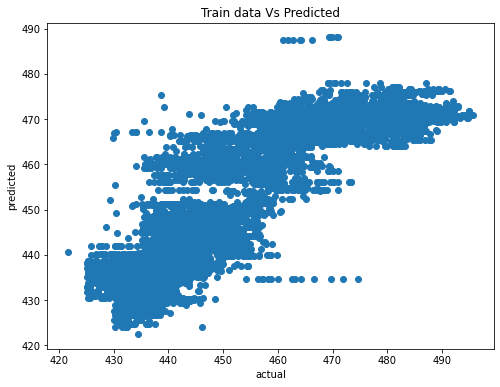

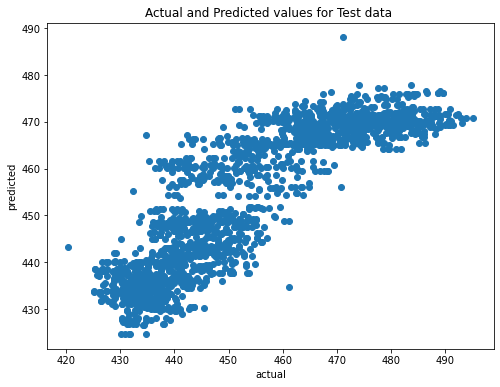

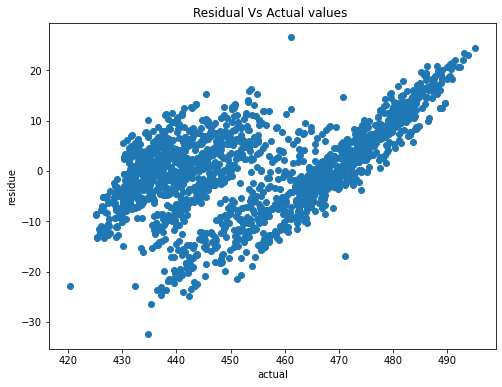

In [12]:
cols = ['V']
predictors = data[cols]
target = data['PE']

##
##
X_train, X_test, y_train, y_test  = train_test_split(predictors, target, random_state = 1 , test_size = 0.2)

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))


ln = LinearRegression()

perform_reg(ln, X_train, X_test, y_train, y_test, 'ln')

Regressing Electrical Energy with Pressure.    


 X_train : (7621, 1)

 X_test : (1906, 1)

 y_train : (7621,)

 y_test : (1906,)

 RMSE :14.957168991688961

 train R2 :0.2741603994608113

 test R2 :0.24888800213561113


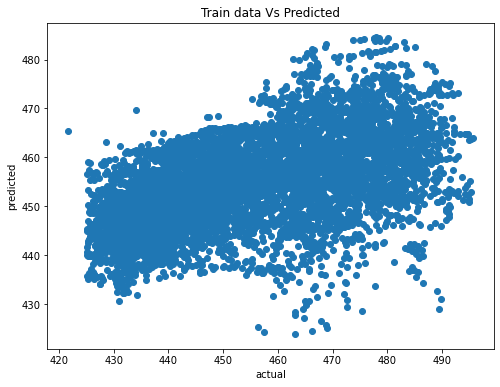

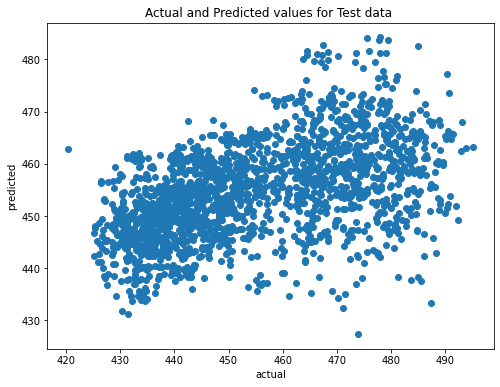

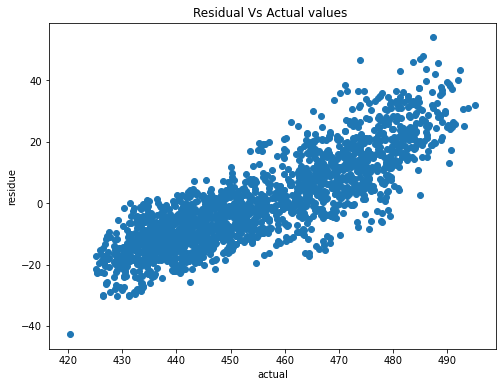

In [13]:
cols = ['AP']
predictors = data[cols]
target = data['PE']

##
##
X_train, X_test, y_train, y_test  = train_test_split(predictors, target, random_state = 1 , test_size = 0.2)

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))


ln = LinearRegression()

perform_reg(ln, X_train, X_test, y_train, y_test, 'ln')

Regressing Electrical Energy with Humidity.  


 X_train : (7621, 1)

 X_test : (1906, 1)

 y_train : (7621,)

 y_test : (1906,)

 RMSE :15.784372712018087

 train R2 :0.15023960725606011

 test R2 :0.16351038669261975


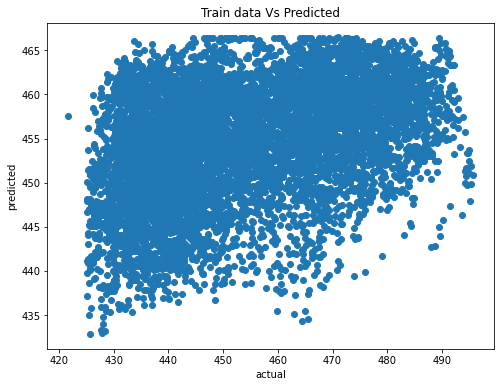

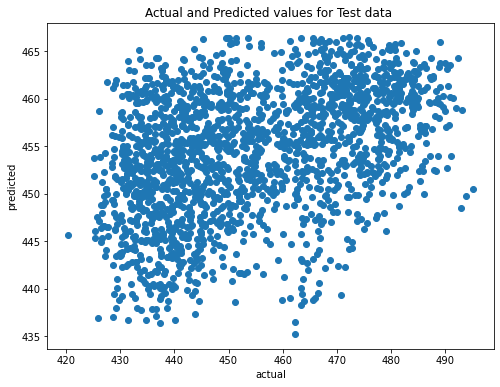

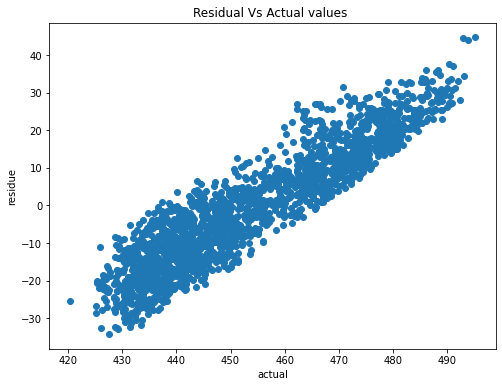

In [14]:
cols = ['RH']
predictors = data[cols]
target = data['PE']

##
##
X_train, X_test, y_train, y_test  = train_test_split(predictors, target, random_state = 1 , test_size = 0.2)

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))


ln = LinearRegression()

perform_reg(ln, X_train, X_test, y_train, y_test, 'ln')

Regressing Electrical Energy with Temperature and Pressure.  


 X_train : (7621, 2)

 X_test : (1906, 2)

 y_train : (7621,)

 y_test : (1906,)

 RMSE :5.273255035761952

 train R2 :0.8987315395317381

 test R2 :0.906639439508074


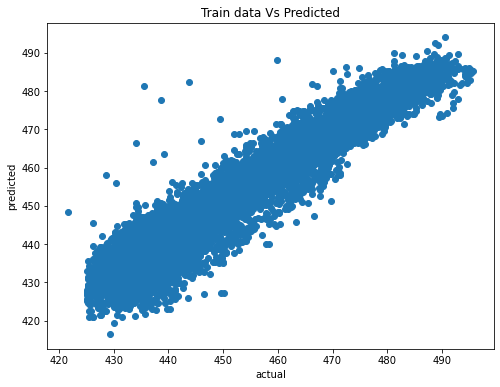

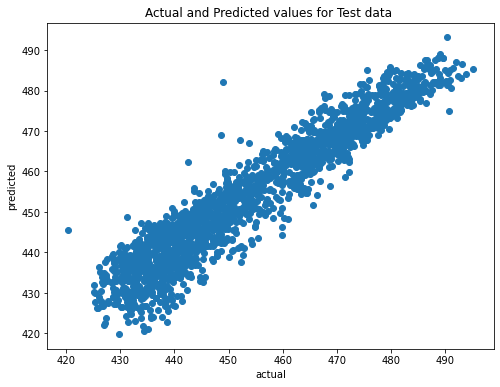

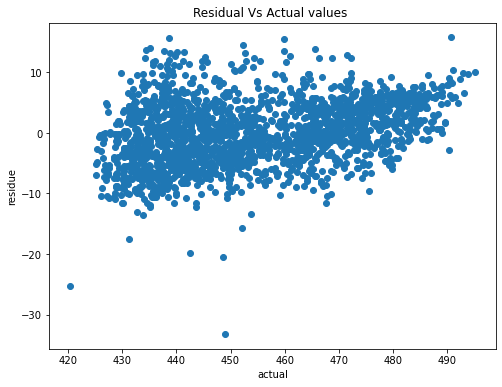

In [15]:
cols = ['AT','AP']
predictors = data[cols]
target = data['PE']

##
##
X_train, X_test, y_train, y_test  = train_test_split(predictors, target, random_state = 1 , test_size = 0.2)

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))


ln = LinearRegression()

perform_reg(ln, X_train, X_test, y_train, y_test, 'ln')

Regressing Electrical Energy with Temperature and Voltage.    


 X_train : (7621, 2)

 X_test : (1906, 2)

 y_train : (7621,)

 y_test : (1906,)

 RMSE :4.815410489764582

 train R2 :0.9139157433397936

 test R2 :0.9221475064567557


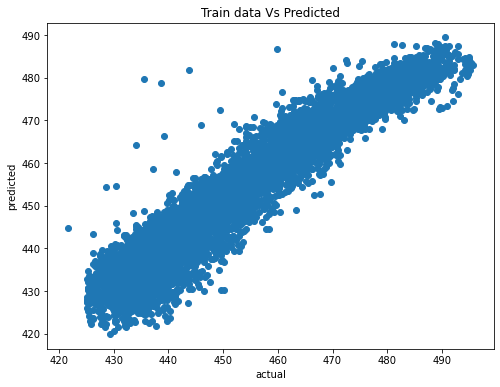

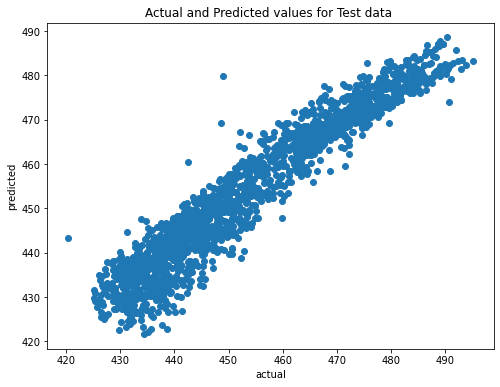

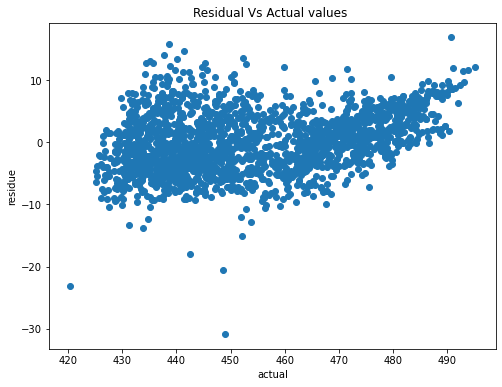

In [16]:
cols = ['AT','V']
predictors = data[cols]
target = data['PE']

##
##
X_train, X_test, y_train, y_test  = train_test_split(predictors, target, random_state = 1 , test_size = 0.2)

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))


ln = LinearRegression()

perform_reg(ln, X_train, X_test, y_train, y_test, 'ln')

Regressing Electrical Energy with Temperature and Humidity.    


 X_train : (7621, 2)

 X_test : (1906, 2)

 y_train : (7621,)

 y_test : (1906,)

 RMSE :4.740860972373437

 train R2 :0.9194708516839185

 test R2 :0.9245393854942664


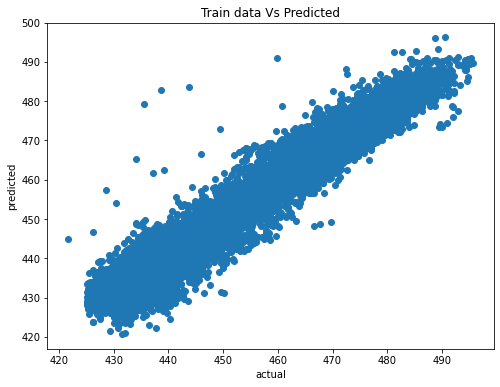

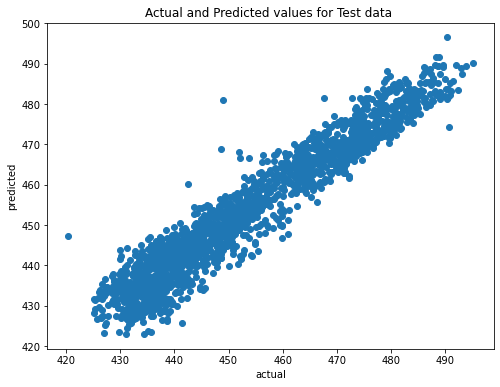

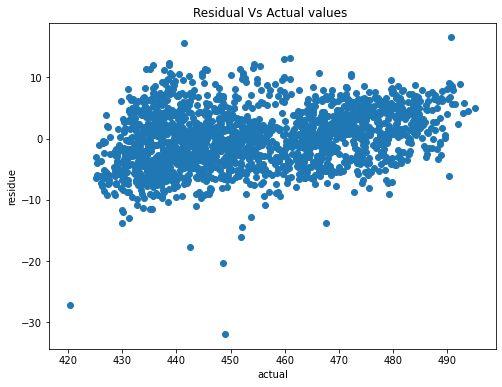

In [17]:
cols = ['AT','RH']
predictors = data[cols]
target = data['PE']

##
##
X_train, X_test, y_train, y_test  = train_test_split(predictors, target, random_state = 1 , test_size = 0.2)

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))


ln = LinearRegression()

perform_reg(ln, X_train, X_test, y_train, y_test, 'ln')

Linear Regression of Energy with Temperature , Humidity and Voltage. 


 X_train : (7621, 3)

 X_test : (1906, 3)

 y_train : (7621,)

 y_test : (1906,)

 RMSE :4.50014379128769

 train R2 :0.927097109119358

 test R2 :0.9320078647887329


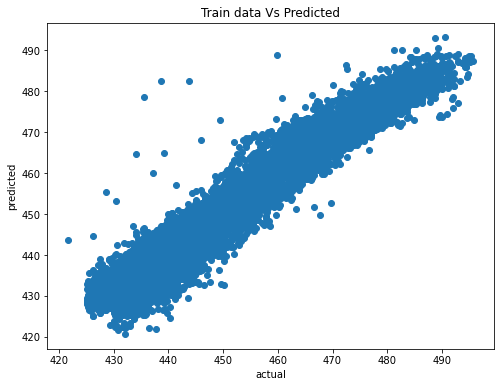

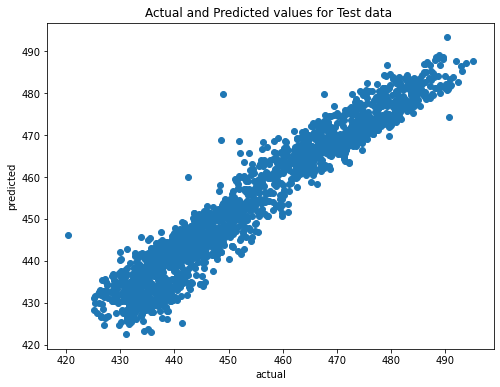

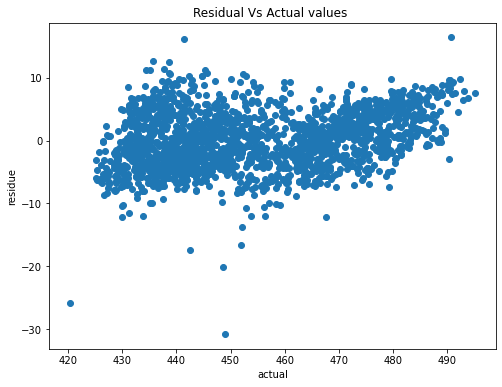

In [18]:
cols = ['AT','RH', 'V']
predictors = data[cols]
target = data['PE']

##
##
X_train, X_test, y_train, y_test  = train_test_split(predictors, target, random_state = 1 , test_size = 0.2)

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))


ln = LinearRegression()

perform_reg(ln, X_train, X_test, y_train, y_test, 'ln')

5 Fold cross validation.  

In [19]:
kf = KFold(shuffle = True , random_state = 123)
ln = LinearRegression()
X = data[['AT','RH','V']]
y = data['PE']
scores = cross_val_score( ln,X,y, cv = kf  )
print("Mean 5 fold cross validation R2 :{}".format(scores.mean()))


Mean 5 fold cross validation R2 :0.9278998083616194


Does scaling improve the model ??  


 X_train : (7621, 3)

 X_test : (1906, 3)

 y_train : (7621,)

 y_test : (1906,)

 RMSE :4.50014379128769

 train R2 :0.927097109119358

 test R2 :0.9320078647887329


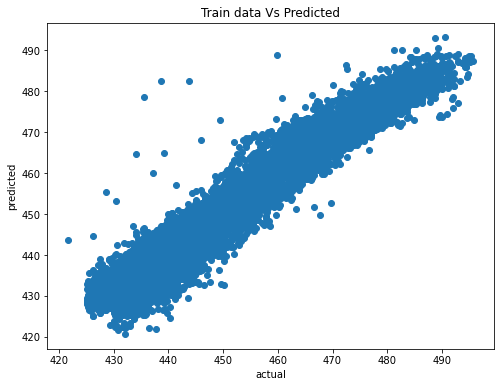

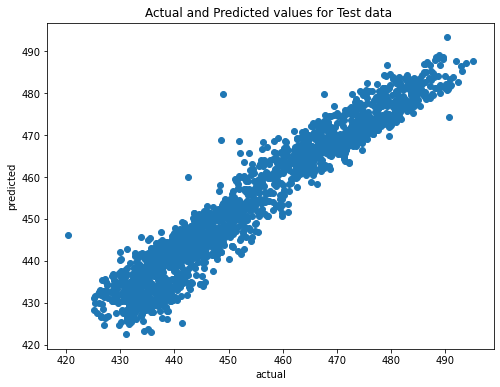

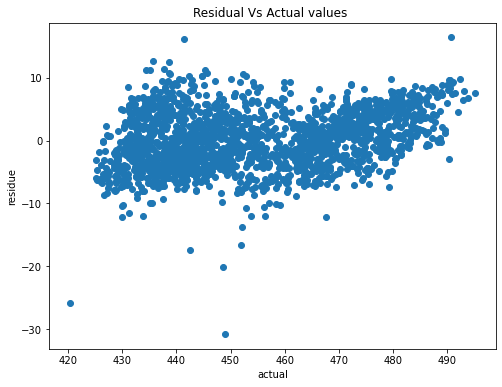

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['AT','RH','V']])
target = data['PE']

##
##
X_train, X_test, y_train, y_test  = train_test_split(scaled_data, target, random_state = 1 , test_size = 0.2)

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))


ln = LinearRegression()

perform_reg(ln, X_train, X_test, y_train, y_test, 'ln')


Linear Regression model for predicting Energy with AT, RH and V gives the best performance with least RMSE.   

Check the Coefficient of regression and P value .  

In [21]:
X = data['AT']
Y = data['PE']
X = sm.add_constant(X)
model = sm.OLS(Y,X )
results = model.fit()
print(results.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.899     
Dependent Variable: PE               AIC:                59269.6095
Date:               2021-01-05 15:07 BIC:                59283.9333
No. Observations:   9527             Log-Likelihood:     -29633.   
Df Model:           1                F-statistic:        8.434e+04 
Df Residuals:       9525             Prob (F-statistic): 0.00      
R-squared:          0.899            Scale:              29.463    
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
const      496.9867    0.1570  3164.8173  0.0000  496.6789  497.2945
AT          -2.1696    0.0075  -290.4213  0.0000   -2.1843   -2.1550
-------------------------------------------------------------------
Omnibus:             413.708       Durbin-Watson:          2.

Check the coefficients for AT and RH.  

In [22]:
mod = ols(formula='PE ~ AT + RH ', data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 5.515e+04
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:07:22   Log-Likelihood:                -28469.
No. Observations:                9527   AIC:                         5.694e+04
Df Residuals:                    9524   BIC:                         5.697e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    516.4296      0.403   1280.042      0.0

Coefficients for AT , RH and V.  

In [23]:
mod = ols(formula='PE ~ AT + RH + V ', data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 4.098e+04
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:07:28   Log-Likelihood:                -27991.
No. Observations:                9527   AIC:                         5.599e+04
Df Residuals:                    9523   BIC:                         5.602e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    518.4965      0.389   1332.210      0.0

In [24]:
## save the model for accessing from the web server and to predict PE based on the input values of AT, RH and V. 
cols = ['AT','RH', 'V']
predictors = data[cols]
target = data['PE']

##
##
X_train, X_test, y_train, y_test  = train_test_split(predictors, target, random_state = 1 , test_size = 0.2)

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))


ln = LinearRegression()

ln.fit(X_train,y_train)

import pickle
pickle.dump(ln, open('ccpp_linear_model.sav', 'wb'))



 X_train : (7621, 3)

 X_test : (1906, 3)

 y_train : (7621,)

 y_test : (1906,)
